# Setup environment in repository

### Temporary yolov5 repo

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 10582, done.
remote: Total 10582 (delta 0), reused 0 (delta 0), pack-reused 10582
Receiving objects: 100% (10582/10582), 10.76 MiB | 18.81 MiB/s, done.
Resolving deltas: 100% (7309/7309), done.
     |████████████████████████████████| 11.2 MB 12.3 MB/s 
     |████████████████████████████████| 15.7 MB 43.8 MB/s 
     |████████████████████████████████| 60.4 MB 1.3 MB/s 
     |████████████████████████████████| 4.3 MB 44.3 MB/s 
     |████████████████████████████████| 596 kB 48.7 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |██████████████████████████████▎ | 834.1 MB 1.4 MB/s eta 0:00:34tcmalloc: large alloc 1147494400 bytes == 0x5615cdabe000 @  0x7f9178666615 0x5615cb6284cc 0x5615cb70847a 0x5615cb62b2ed 0x5615cb71ce1d 0x5615cb69ee99 0x5615cb6999ee 0x5615cb62cbda 0x5615cb69ed00 0x5615cb6999ee 0x5615cb62cbda 0x5615cb69b737 0x5615cb71dc66 0x5615cb69adaf 0x5615c

## Import dependencies

In [ ]:
import torch
import cv2

from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from IPython.display import Image  # for displaying images


# Training process

## Obtain data from open source (mask dataset)

In [ ]:
!curl -L "https://universe.roboflow.com/ds/3oxMKkGCV1?key=WoBw9fwZIK" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0    776      0  0:00:01  0:00:01 --:--:--   776
100 11.9M  100 11.9M    0     0  9603k      0  0:00:01  0:00:01 --:--:-- 9603k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.22a0a2199dcddb8f39a28b70ca591e9a.jpg  
 extracting: test/images/1224331650_g_400-w_g_jpg.rf.16b1d270ea24a69513397373e7c85610.jpg  
 extracting: test/images/126202-untitled-design-13_jpg.rf.9b4e234997f88006758ab3259dcec1f1.jpg  
 extracting: test/images/1288126-10255706714jpg_jpg.rf.14db6e4b4491d288a0b38b9cd49ea97d.jpg  
 extracting: test/images/15391513324714o1n0r10n6_jpg.rf.4a13713f88d2eb2f59ea7ed665e430c9.jpg  
 extracti

## Check Directory for train images and test images with label

In [ ]:
%cd yolov5
!pwd

/content/yolov5
/content/yolov5


## Train YOLOv5s using yaml file and dataset provided

Best practices for training

https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results

In [ ]:
# Set cfg file for YOLOv5s architecture or use yolov5s pretrained weights

!python train.py --img 640 --batch 16 --epochs 300 --data "../data.yaml" --weights "yolov5s.pt" 

train: weights=yolov5s.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-200-g9708cf5 torch 1.10.1+cu102 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.

## Save weight into local repo (Drive) (Optional)

In [ ]:
# save best model to current repo
import shutil

shutil.copy("/content/yolov5/runs/train/exp/weights/best.pt",r"/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/best_mask.pt")

'/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/best_mask.pt'

# Testing the model

In [ ]:
# source (image for detection, can be video or youtube link or ...) *Refer the documentation
# data (the dataset structure, for mask detector only 2 classes (mask, no mask) )
# weights (the trained best weight.pt file)
# img (image size)
# conf (confidence score)
# save-txt (save the bbox text file)

!python detect.py --source '/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3.jpg' --data "../data.yaml" --weights "/content/yolov5/runs/train/exp2/weights/best.pt" --img 640 --conf 0.5 --save-txt 

detect: weights=['/content/yolov5/runs/train/exp2/weights/best.pt'], source=/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3.jpg, data=../data.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-200-g9708cf5 torch 1.10.1+cu102 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3.jpg: 352x640 3 masks, Done. (0.022s)
Speed: 0.5ms pre-process, 22.4ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp5
1 labels saved to runs/detect/exp5/labels


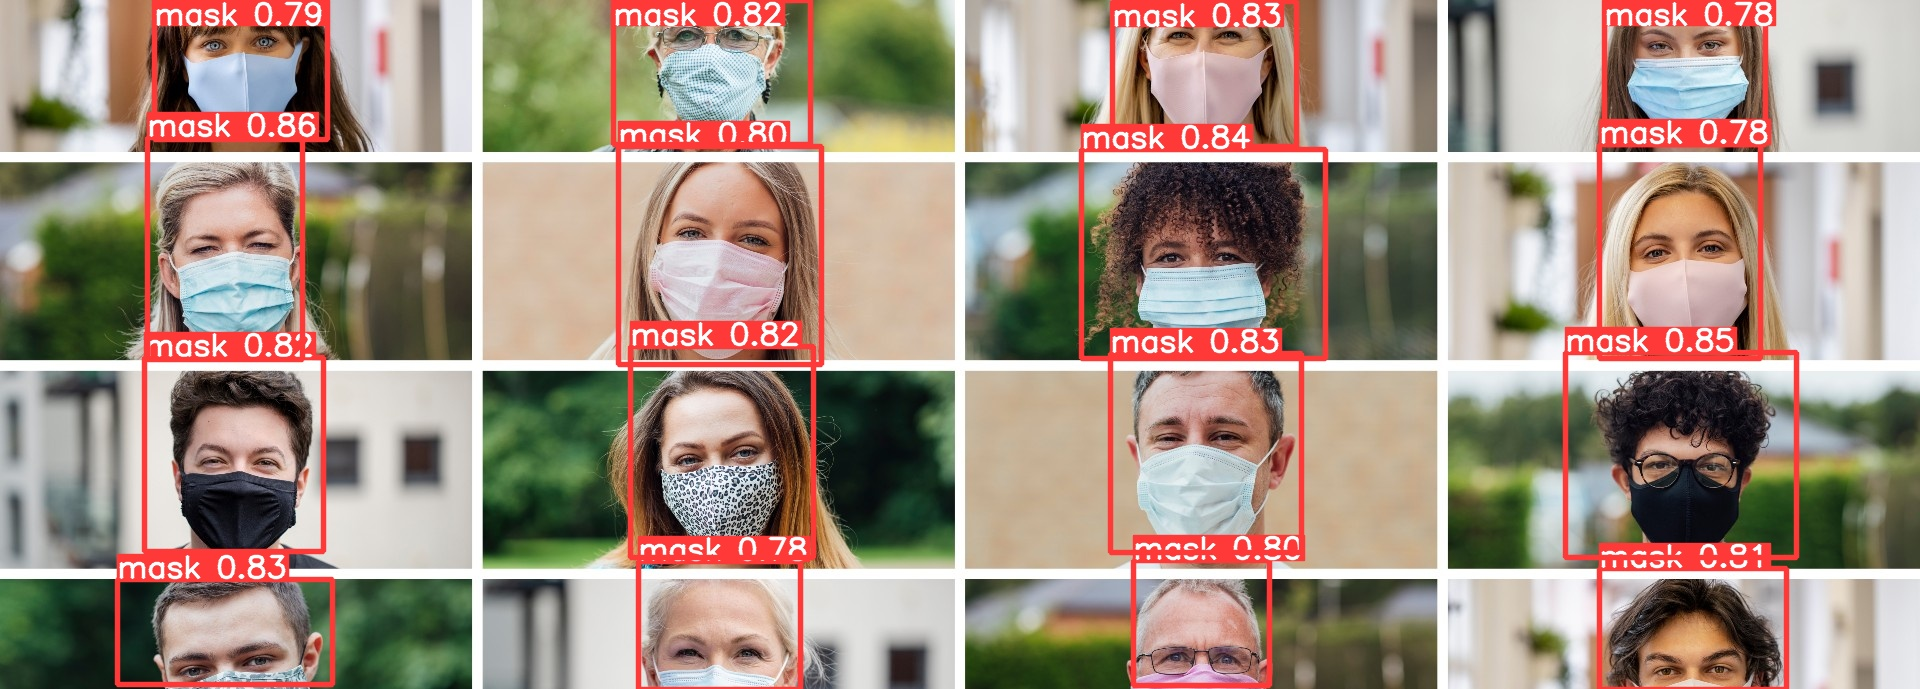

In [ ]:
img = cv2.imread("/content/yolov5/runs/detect/exp4/mask2.jpg")
cv2_imshow(img)

### Paste the result into desired folder (optional)

In [ ]:
from distutils.dir_util import copy_tree
copy_tree("/content/yolov5/runs/detect/exp5",r"/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3_result")

['/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3_result/mask3.jpg',
 '/content/drive/MyDrive/Colab Notebooks/YOLOv5_own_project/mask3_result/labels/mask3.txt']